### Carga de paquetes

In [19]:
import numpy as np


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #Para graficar
from skimage.io import imshow #Para graficar las imagenes
import tensorflow as tf


import os
import glob
#from PIL import Image
import cv2

#import pyheif

import matplotlib.pyplot as plt

from Funciones import Leer_fotos


In [1]:
root_path = "C:/MaestriaDocs/DMA/Nuestras Caras/"
directorio_origen = root_path + "Nuestras Caras"
#path="C:/Users/nsantesteban.avalian/Desktop/Nuestras Caras"
destino = root_path + "Caras_cortadas" #carpeta donde se guardaran las imagenes de caras cortadas

In [4]:
#names = []
#for dir in os.listdir(directorio_origen):
#    names.append(dir)
#names.count
#names

names = fun.nombres(directorio_origen)

Convertimos los archivos formatio hiec a jpg

In [5]:
"""
from PIL import Image
import imageio

def convertir_heic_a_jpg(ruta_entrada, ruta_salida):
    try:
        # Lee la imagen HEIC
        imagen_heic = imageio.imread(ruta_entrada)
        # Guarda la imagen como JPEG
        imageio.imwrite(ruta_salida, imagen_heic)
        print("La conversión se ha realizado con éxito.")
    except Exception as e:
        print(f"Error al convertir la imagen: {e}")

def convertir_persona_HIEC_a_jpg(ruta_persona):

    for archivo_hiec in glob.glob(os.path.join(ruta_persona, "*.HEIC")):
        
        HIEC_archivo_sin_ext, _ = os.path.splitext(archivo_hiec)
        jpg_path = HIEC_archivo_sin_ext + ".jpg"
        convertir_heic_a_jpg(archivo_hiec, jpg_path)
        
        """

Funcion que lee las fotos y si encuentra fotos formato hiec las convierte a jpg

In [21]:
Leer_fotos(directorio_origen)

NameError: name 'convertir_persona_HIEC_a_jpg' is not defined

In [22]:
"""
# Diccionario para almacenar las fotos
def Leer_fotos(directorio_origen_f):
    fotos_int= {} # diccionario interno q sea persona y el vector de fotos, 
    #despues elegimos una de las dos estructuras
    #v_fotos_personas =[] #este vector tendra todas las fotos
    #v_nombre_personas = [] #este vector tendra el nombre de la persona, forrespondiente a la foto del vetor fotos_persona en la misma posicion
    # Recorrer las subcarpetas

    for nombre_persona in os.listdir(directorio_origen_f):
        # Ruta de la subcarpeta
        ruta_persona = os.path.join(directorio_origen_f, nombre_persona)

        # Lista para almacenar las fotos de la persona
        fotos_persona = []    
        #convertir hiec a png
        convertir_persona_HIEC_a_jpg(ruta_persona)
        # Recorrer las fotos de la persona
        for archivo in glob.glob(os.path.join(ruta_persona, "*.jpg")) :
            # Cargar la imagen
            imagen = cv2.imread(archivo)              
            fotos_persona.append(imagen)
            #v_fotos_personas.append(imagen)
            #_nombre_personas.append(nombre_persona)
            # Agregar las fotos de la persona al diccionario
        fotos_int[nombre_persona] = fotos_persona
    return fotos_int

"""

# llamada a la funcion leer fotos, con el directorio de origen
#fotos = fun.Leer_fotos(directorio_origen)
fotos = Leer_fotos(directorio_origen)


NameError: name 'convertir_persona_HIEC_a_jpg' is not defined

In [7]:
# Mostrar información
nombres_personas = list(fotos.keys())
print("Cantidad de personas:", len(nombres_personas))
print("Cantidad de fotos por persona:")
for nombre_persona, fotos_persona in fotos.items():
    print(f"- {nombre_persona}: {len(fotos_persona)}")



Cantidad de personas: 18
Cantidad de fotos por persona:
- Carlos: 14
- Federico G: 14
- Federico R: 15
- Florencia: 10
- Franco A: 17
- Franco S: 8
- Gerard: 11
- Gustavo: 8
- Joaquin: 11
- Juan: 12
- Lautaro: 18
- Lisandro: 15
- Marco: 9
- Matias: 15
- Natalia: 11
- Noelia: 13
- Paola: 14
- Victorio: 10


## funcion para imprimir fotos de una persona

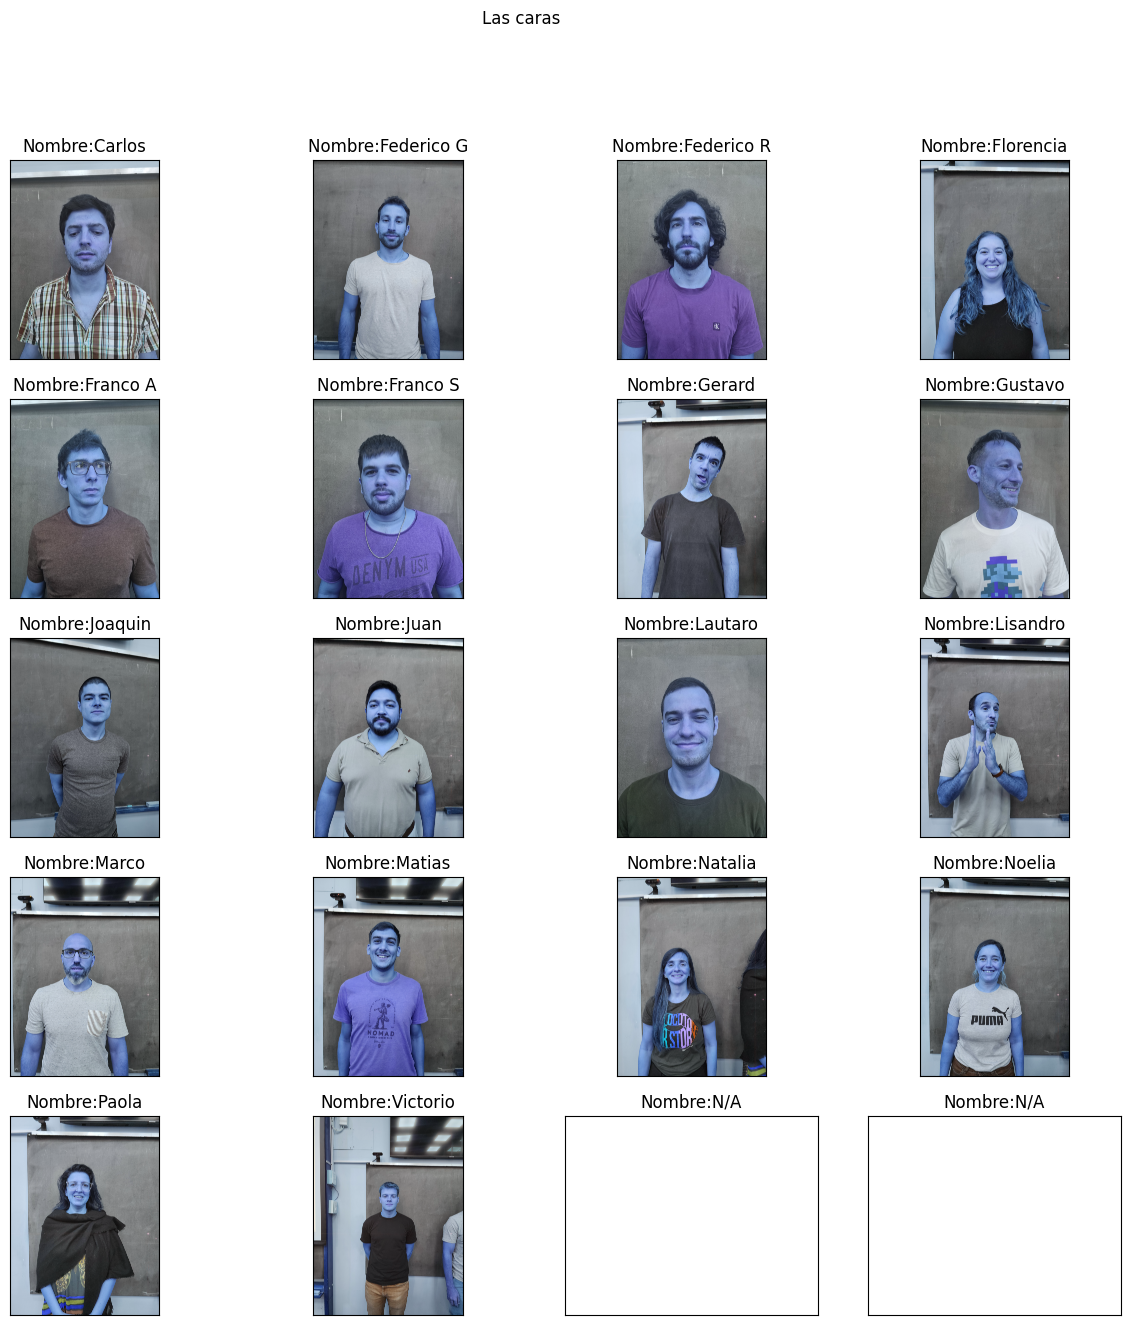

In [8]:
def show_people(images):
    names_target = list(images.keys())

    rows = 5
    cols = 4
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))

    axarr=axarr.flatten()
    
    for image_index in range(len(names_target)):
        axarr[image_index].imshow(images[names_target[image_index]][0])
        axarr[image_index].set_xticks([])
        axarr[image_index].set_yticks([])
        axarr[image_index].set_title("Nombre:{}".format(names_target[image_index]))
    
    #Replico formato a los que no tienen caras
    for image_index in range(len(names_target), (rows * cols)):     
        axarr[image_index].set_xticks([])
        axarr[image_index].set_yticks([])
        axarr[image_index].set_title("Nombre:N/A")

    plt.suptitle("Las caras")
    
# llamada a la funcion que imprime
show_people(fotos)

## Funcion para imprimir X cantidad de fotos por persona

In [9]:
def show_people_agg_cant(dfotos, cant):
    #Visualizacion de "cant"  imagenes por cada alumno
    n_pics_per_person = cant
    n_cols = n_pics_per_person
    
    names_= list(dfotos.keys())
    n_rows = len(names_)  #18
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(1.6*n_cols, 2*n_rows))
    
    index=0
    for nombre in names_:
        
        # Select images using boolean indexing
        img = dfotos[nombre]
        
        for image_index in range(min(len(img),cant)):
            imag_i = img[image_index]
            axs[index, image_index].imshow(imag_i)
            axs[index, image_index].set_xticks([])
            axs[index, image_index].set_yticks([])
        
        axs[index, 0].set_title(nombre)
        index += 1


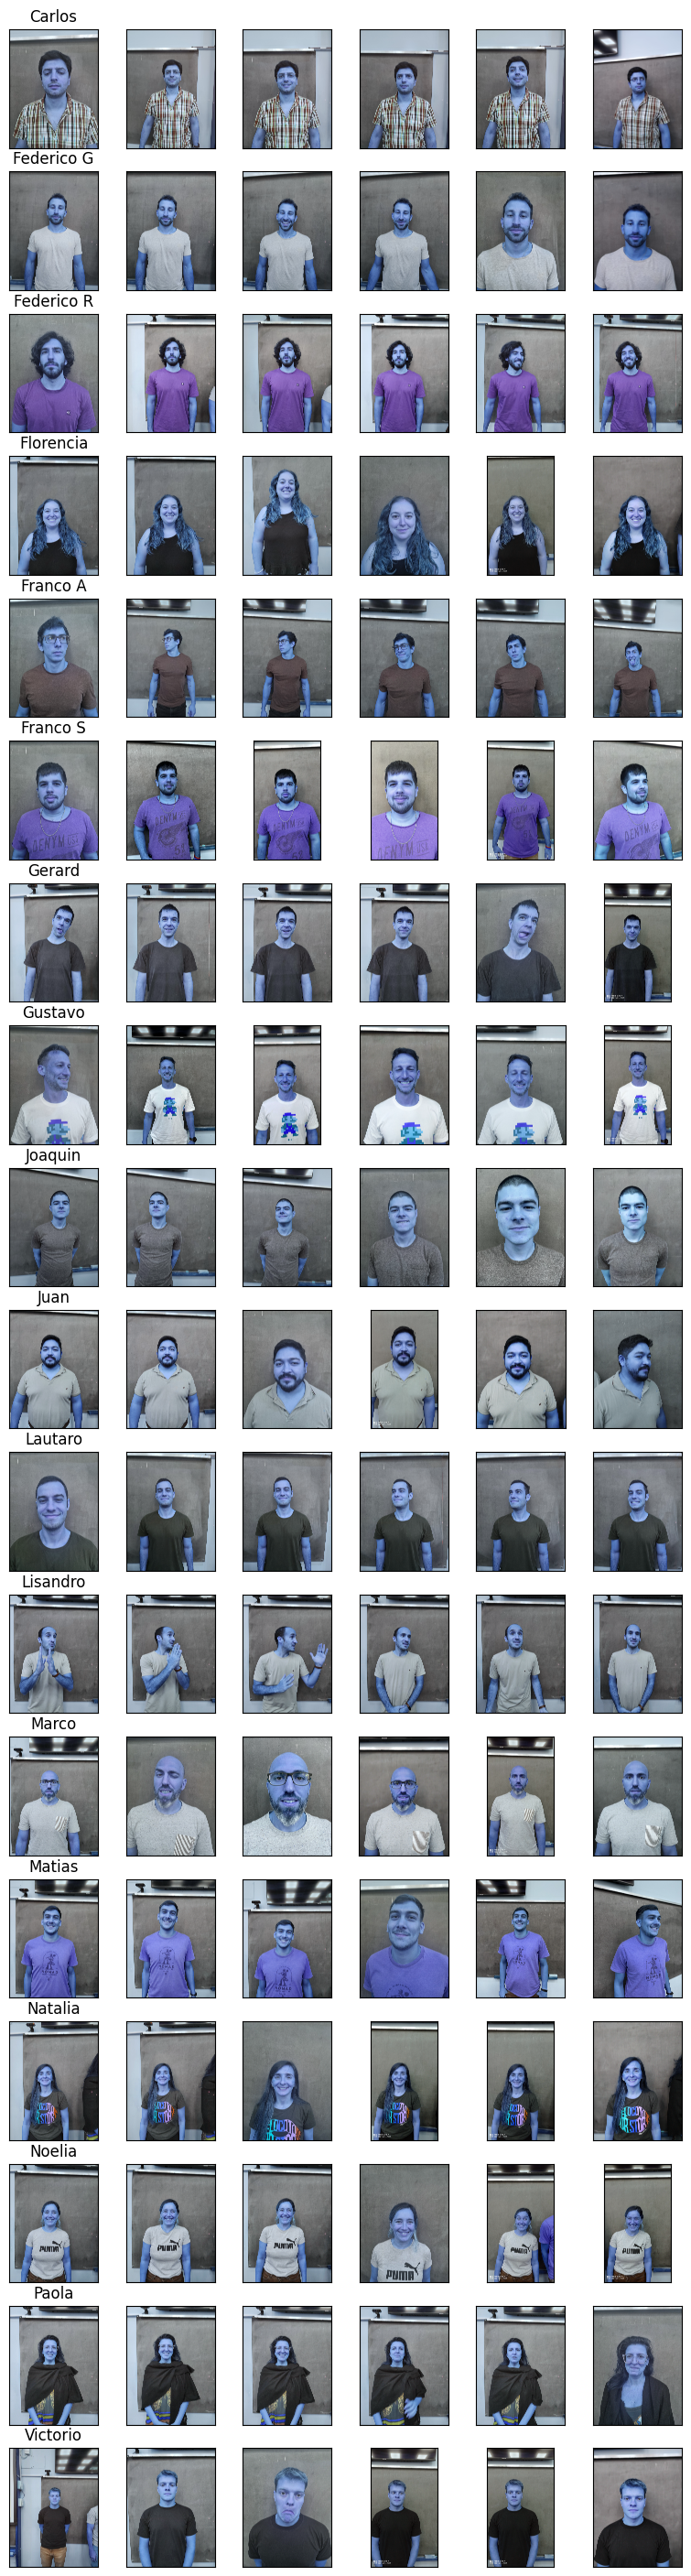

In [10]:
show_people_agg_cant(fotos,6)

## Funcion para recortar imagenes

## Recortar imagen

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

def recortar_imagen(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Utilizar un clasificador específico para caras
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

    # Detectar rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3, minSize=(30, 30))

    # Recorrer las caras detectadas
    face_images = []
    for (x, y, w, h) in faces:
        # Recortar la cara de la imagen
        face_images.append(image[y:y+h, x:x+w])

    return face_images

## Mostrar Matriz de imagen

## Procesar Carpetas

In [14]:
# (PRUEBA) - Revisar el reconocimieto del botón entre las imágenes de carlos scaleFactor y minNeighbors)

def procesar_carpetas(directorio_origen, directorio_destino):
    # Iterar sobre las carpetas dentro del directorio
    # Crea el directorio si no existe
    if not os.path.exists(directorio_destino):
       os.makedirs(directorio_destino)

    for root, dirs, files in os.walk(directorio_origen):
        for dir_name in dirs:
            print("Carpeta:", dir_name)
            dir_path = os.path.join(root, dir_name) #directorio origen de la persona 
            dir_path_recorte = os.path.join(directorio_destino, dir_name) #directorio destino de la persona
            
            if not os.path.exists(dir_path_recorte):
                os.makedirs(dir_path_recorte) #creamos carpetas para cada nombre
            
            images = []

            numero=0 #numero de la foto dentro del directorio
            
            for file in glob.glob(os.path.join(dir_path, "*.jpg")) :
                # Verificar si el archivo es una imagen
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    # Leer la imagen
                    image_path = os.path.join(dir_path, file)
                    image = cv2.imread(image_path)
                    
                    if image is not None:
                        # Recortar la imagen
                        numero +=1
                        face_images = recortar_imagen(image)
                        images.extend(face_images)
                        numero_interno=0
                        for face_image in face_images:
                            gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
                            numero_interno +=1
                            numero_formateado = str(numero).zfill(2)
                            numero_interno_formateado = str(numero_interno).zfill(2)
                            #_{image_path.split('.')[0]}_
                            output_path = os.path.join(dir_path_recorte , f"{dir_name}_{numero_formateado}_{numero_interno_formateado}.jpg")
                            # Save the cropped face to the output directory                       
                            cv2.imwrite(output_path, gray_image)



            # Mostrar las imágenes de la carpeta en una matri         mostrar_matriz_de_imagenes(images)

# Ruta de la carpeta general que contiene subcarpetas con imágenes
#carpeta_general = path

# Procesar las carpetas y recortar las caras de las imágenes



In [17]:
def procesar_carpetas(directorio_origen, directorio_destino):
    # Iterar sobre las carpetas dentro del directorio
    #dir_name_recorte = "C:/Users/nsantesteban.avalian/Desktop/Caras_Recortadas"
    # dir_name_recorte =  path_destino
    # Crea el directorio si no existe
    if not os.path.exists(directorio_destino):
       os.makedirs(directorio_destino)

    for root, dirs, files in os.walk(directorio_origen):
        for dir_name in dirs:
            print("Carpeta:", dir_name)
            dir_path = os.path.join(root, dir_name) #directorio origen de la persona 
            dir_path_recorte = os.path.join(directorio_destino, dir_name) #directorio destino de la persona
            
            if not os.path.exists(dir_path_recorte):
                os.makedirs(dir_path_recorte) #creamos carpetas para cada nombre
            
            images = []

            numero=0 #numero de la foto dentro del directorio
            
            for file in glob.glob(os.path.join(dir_path, "*.jpg")) :
                # Verificar si el archivo es una imagen
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    # Leer la imagen
                    image_path = os.path.join(dir_path, file)
                    image = cv2.imread(image_path)
                    
                    if image is not None:
                        # Recortar la imagen
                        numero +=1
                        face_images = recortar_imagen(image)
                        images.extend(face_images)
                        numero_interno=0
                        for face_image in face_images:
                            gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
                            numero_interno +=1
                            numero_formateado = str(numero).zfill(2)
                            numero_interno_formateado = str(numero_interno).zfill(2)
                            #_{image_path.split('.')[0]}_
                            output_path = os.path.join(dir_path_recorte , f"{dir_name}_{numero_formateado}_{numero_interno_formateado}.jpg")
                            # Save the cropped face to the output directory                       
                            cv2.imwrite(output_path, gray_image)



            # Mostrar las imágenes de la carpeta en una matri         mostrar_matriz_de_imagenes(images)


In [18]:
procesar_carpetas(directorio_origen, destino)

Carpeta: Carlos
Carpeta: Federico G
Carpeta: Federico R
Carpeta: Florencia
Carpeta: Franco A
Carpeta: Franco S
Carpeta: Gerard
Carpeta: Gustavo
Carpeta: Joaquin
Carpeta: Juan
Carpeta: Lautaro
Carpeta: Lisandro
Carpeta: Marco
Carpeta: Matias
Carpeta: Natalia
Carpeta: Noelia
Carpeta: Paola
Carpeta: Victorio


## Analisis Componentes Principales.

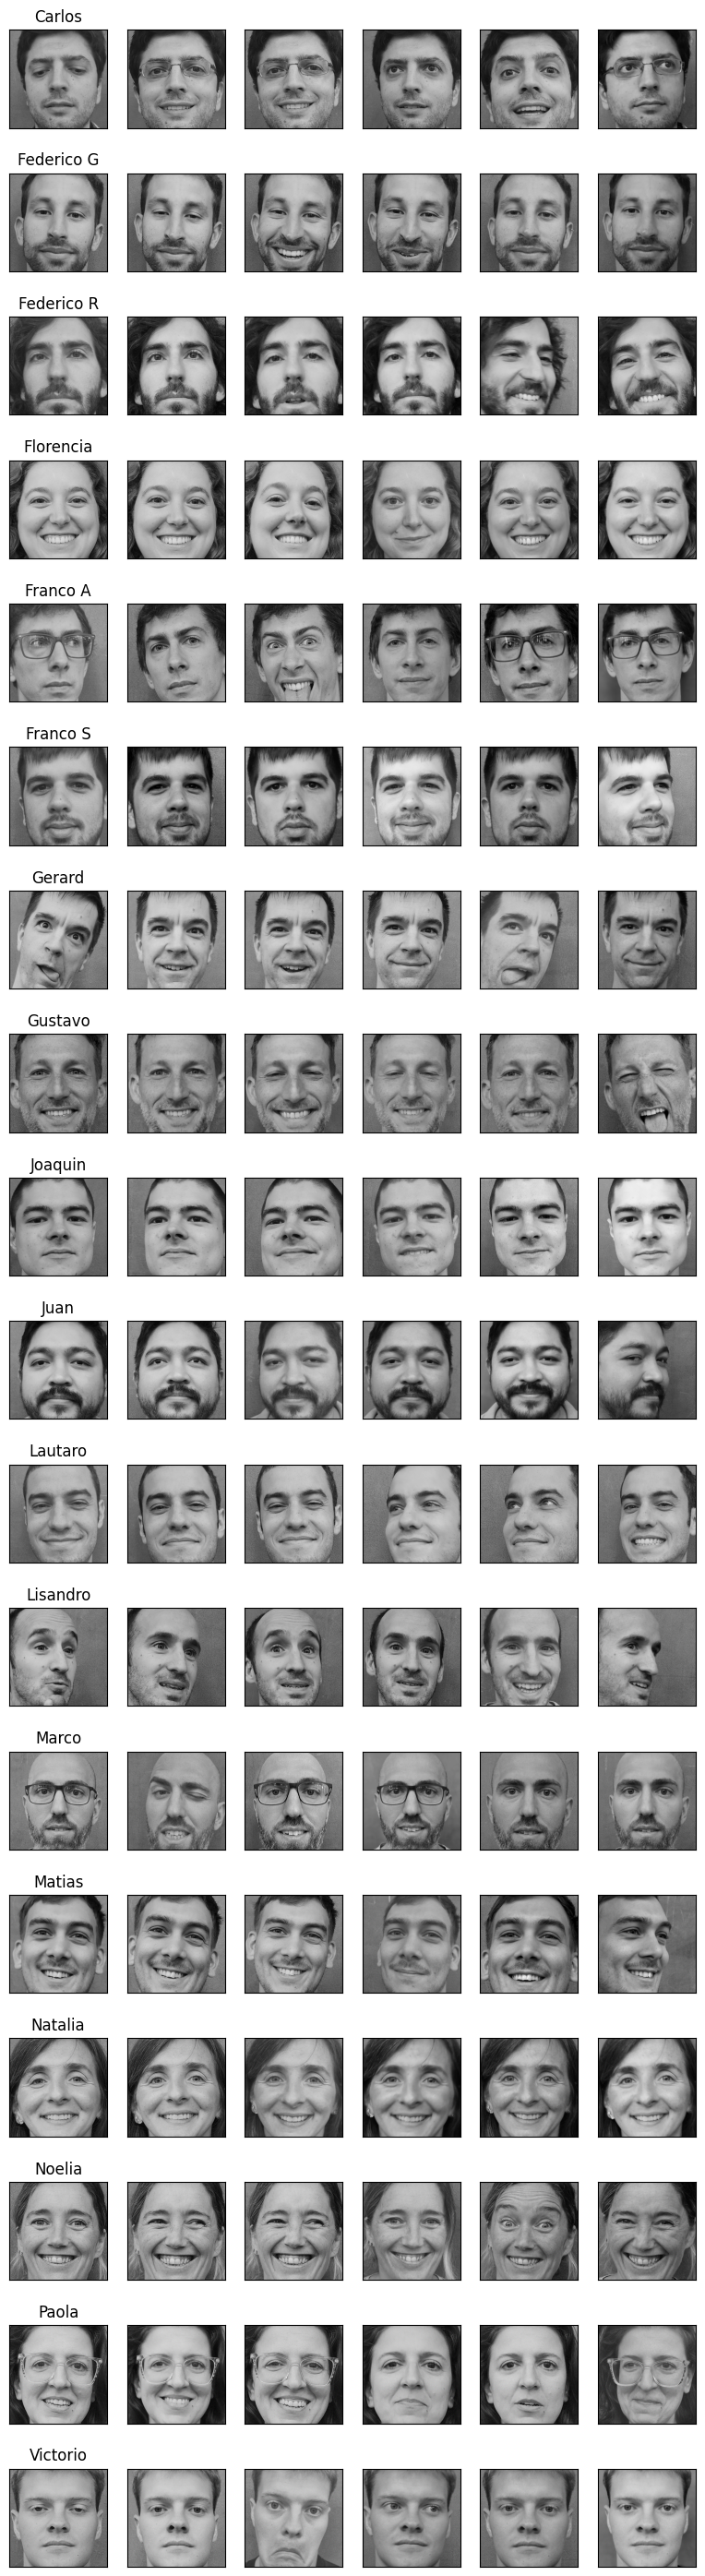

In [74]:
fotos_caras2 = Leer_fotos(destino)
show_people_agg_cant(fotos_caras2,6)

### PCA

Conversión de las imágenes a un Numpy Array. Conversión de los datos a una matriz que contiene datos sin procesar. La función array by numpy toma una lista como entrada-

In [116]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Definir la ruta del directorio con las imágenes recortadas
dir_name_recorte = destino

# Tamaño fijo al que redimensionar todas las imágenes
desired_size = (30, 30)
# Guardar las imágenes proyectadas
output_directory = root_path + "PCA"
# Listas para almacenar las imágenes y sus nombres
images = []
image_names = []
image_person = []

# Leer las imágenes del directorio y almacenarlas en las listas
images = []
for root, dirs, files in os.walk(dir_name_recorte):
        for dir_name in dirs:
            print("Carpeta:", dir_name)
            dir_path = os.path.join(root, dir_name) #directorio  de la persona
            dir_destino_path = os.path.join(root, dir_name) #directorio  de la persona
            for file_name in os.listdir(dir_path):
                #for file_name in glob.glob(os.path.join(dir_path, "*.jpg")) :
            
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    image_path = os.path.join(dir_path, file_name)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
                if image is not None:
                    # Redimensionar la imagen al tamaño deseado
                    resized_image = cv2.resize(image, desired_size)
            
                    # Sobrescribir la imagen original con la imagen redimensionada

                    #cv2.imwrite(image_path, resized_image)

                    images.append(resized_image.flatten())  # Aplanar la imagen y agregarla a la lista
                    image_names.append(file_name)
                    image_person.append(dir_name)
# Convertir la lista de imágenes a una matriz NumPy
image_matrix = np.array(images) 
# Aplicar PCA
num_components = 109  # Número de componentes principales a mantener
pca = PCA(n_components=num_components)
pca.fit(image_matrix)
# Proyectar las imágenes al espacio de los componentes principales
projected_images = pca.transform(image_matrix)



if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for i, projected_image in enumerate(projected_images):
    output_path = os.path.join(output_directory, f"{image_names[i].split('.')[0]}_proyectada.npy")
    np.save(output_path, projected_image)

Carpeta: Carlos
Carpeta: Federico G
Carpeta: Federico R
Carpeta: Florencia
Carpeta: Franco A
Carpeta: Franco S
Carpeta: Gerard
Carpeta: Gustavo
Carpeta: Joaquin
Carpeta: Juan
Carpeta: Lautaro
Carpeta: Lisandro
Carpeta: Marco
Carpeta: Matias
Carpeta: Natalia
Carpeta: Noelia
Carpeta: Paola
Carpeta: Victorio


In [ ]:
# import os
# import cv2
# import numpy as np
# from sklearn.decomposition import PCA

# # Definir la ruta del directorio con las imágenes recortadas
# dir_name_recorte = destino

# # Tamaño fijo al que redimensionar todas las imágenes
# desired_size = (30, 30)

# # Listas para almacenar las imágenes y sus nombres
# images = []
# image_names = []

# # Leer las imágenes del directorio y almacenarlas en las listas
# for file_name in os.listdir(dir_name_recorte):
#     if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
#         image_path = os.path.join(dir_name_recorte, file_name)
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
#         if image is not None:
#             # Redimensionar la imagen al tamaño deseado
#             resized_image = cv2.resize(image, desired_size)
            
#             # Sobrescribir la imagen original con la imagen redimensionada
#             cv2.imwrite(image_path, resized_image)

#             images.append(image.flatten())  # Aplanar la imagen y agregarla a la lista
#             image_names.append(file_name)


# # Convertir la lista de imágenes a una matriz NumPy
# image_matrix = np.array(images)

# # Aplicar PCA
# num_components = 18  # Número de componentes principales a mantener
# pca = PCA(n_components=num_components)
# pca.fit(image_matrix)

# # Proyectar las imágenes al espacio de los componentes principales
# projected_images = pca.transform(image_matrix)

# # Guardar las imágenes proyectadas
# output_directory = "C:/Users/nsantesteban.avalian/Desktop/PCA"

# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

# for i, projected_image in enumerate(projected_images):
#     output_path = os.path.join(output_directory, f"{image_names[i].split('.')[0]}_proyectada.npy")
#     np.save(output_path, projected_image)

##PCA Paso a Paso

In [93]:
import numpy as np

faces_array=image_matrix

# Select every 3rd column starting from 0 up to 900 (inclusive)
selected_cols = np.arange(0, 900)    #Crea y devuelve una referencia a un array de una dimención cuyos elementos 
                                     #son la secuencia desde el inicio hasta el fin tomando valores a cada salto.
                                     #np.arange(inicio, fin, salto). El salto se puede no poner por defecto toma valor 1

# Indexación avanzada para seleccionar las columnas de faces_array
new_faces_array = faces_array[:, selected_cols]

In [94]:
# Paso 1: Centrar los datos
new_faces_array_centered = new_faces_array - new_faces_array.mean(axis=0)

In [95]:
# Paso 2: Cálculo matriz de Covarianza
cov_matrix = np.cov(new_faces_array_centered, rowvar=False)

In [96]:
# Paso 3: Cálculo matriz eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [97]:
# Paso 4: Ordenar los eigenvectors por disminución eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

In [104]:
# Paso 5: Elejir la cantidad de componentes principales que se desean conservar
explained_variances = (eigenvalues / np.sum(eigenvalues)) * 100
total_variance = np.cumsum(explained_variances) 
# calcula la suma acumulativa de los elementos en el arreglo explained_variances utilizando la función cumsum() de NumPy.

# explained_variances es un arreglo unidimensional que contiene las varianzas explicadas por cada componente principal en orden descendente 
# (es decir, el primer elemento es la varianza explicada por el primer componente principal, el segundo elemento es la suma de las varianzas explicadas 
# por el primer y segundo componentes principales, y así sucesivamente).
# El resultado de np.cumsum(explained_variances) será otro total_variance  de la misma longitud que explained_variances, 
# donde cada elemento representa la suma acumulativa de las varianzas explicadas hasta el índice correspondiente.
num_components = np.argmax(total_variance >= 95) + 1
# np.argmax(total_variance >= 95) devuelve el índice del primer elemento en el arreglo total_variance que es mayor o igual a 95. 
# Luego se le suma 1 para obtener el número de componentes principales necesario para explicar al menos el 95% de la varianza total.

print(f'Cantidad de componentes a utilizar: {num_components}')
print(explained_variances)



Cantidad de componentes a utilizar: 109
[ 1.74071643e+01  1.15816444e+01  9.31597988e+00  6.42474537e+00
  4.37922798e+00  3.70414852e+00  2.75904128e+00  2.20007740e+00
  2.00479533e+00  1.82846149e+00  1.59822667e+00  1.45432743e+00
  1.37374270e+00  1.23069299e+00  1.09342518e+00  1.00621468e+00
  9.35289438e-01  8.81161376e-01  8.09031897e-01  7.69151205e-01
  7.36296582e-01  7.29626057e-01  6.35415370e-01  6.24755399e-01
  5.87265397e-01  5.68945661e-01  5.63788845e-01  5.30766083e-01
  5.14642783e-01  4.98761606e-01  4.48618906e-01  4.39686861e-01
  4.22604313e-01  4.08413883e-01  3.90515806e-01  3.80116558e-01
  3.69398275e-01  3.62049944e-01  3.57986392e-01  3.44379792e-01
  3.40573708e-01  3.30883003e-01  3.22579091e-01  3.15377900e-01
  3.11644756e-01  2.93304297e-01  2.83444019e-01  2.79397015e-01
  2.71847049e-01  2.67048266e-01  2.65584498e-01  2.51462787e-01
  2.49215136e-01  2.39204341e-01  2.38381279e-01  2.29527837e-01
  2.26152588e-01  2.18963011e-01  2.14929700e-01  

In [105]:
# Paso 6: Proyectar los datos centrados sobre la nueva base formada por los eigenvectors
new_basis = eigenvectors[:, :num_components]
new_faces_array_transformed = np.dot(new_faces_array_centered, new_basis) #multiplicacion matricial

In [106]:
# Paso 7: Mostrar los datos transformados
print(new_faces_array_transformed)


[[ 3.12823975e+02  3.79053412e+02 -2.90627593e+02 ... -3.01490742e+01
  -3.20920454e+01  5.82173619e-01]
 [ 3.81955282e+02  7.26187320e+01 -2.91650366e+02 ... -7.63100287e+01
   4.79301523e+01 -7.07775935e+01]
 [ 3.66427875e+02  1.66290423e+02 -3.55091473e+02 ... -2.53597108e+01
   2.92024378e+00  4.86997978e+01]
 ...
 [-1.00808386e+03 -5.28754630e+02 -1.54771458e+02 ...  3.33821136e+01
  -3.02887680e+01 -1.34668756e+01]
 [-1.46145156e+02  6.42042334e+01 -4.60664428e+01 ... -5.26418576e+01
   2.53120699e+01 -5.46900347e+00]
 [-6.37918106e+02 -2.74798667e+02 -3.05456884e+02 ... -1.33901752e+00
   4.82194371e+01  1.07817761e+01]]


In [102]:
# Para ver el nro de imágenes proyectadas y la cantidad de componentes principales

# Verificar las dimensiones de new_faces_array_transformed
num_images_proyected, num_components_selected = new_faces_array_transformed.shape

print("Número de imágenes proyectadas:", num_images_proyected)
print("Número de componentes principales seleccionadas:", num_components_selected)



Número de imágenes proyectadas: 213
Número de componentes principales seleccionadas: 109


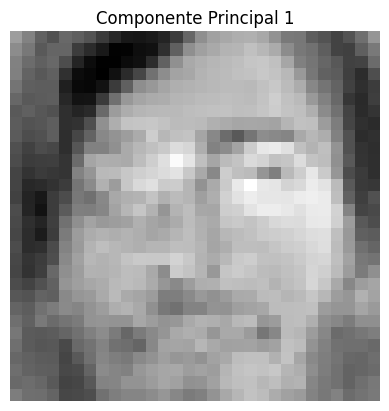

In [110]:
import matplotlib.pyplot as plt

# Indicar componente principal específica
indice_componente_principal = 0

# Extrae la componente principal correspondiente
componente_principal = eigenvectors[:, indice_componente_principal]

# Normaliza la componente principal para que sus valores estén en el rango [0, 255]
#componente_principal_normalizada = (componente_principal - componente_principal.min()) / (componente_principal.max() - componente_principal.min()) * 255
componente_principal_normalizada = componente_principal
# Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

# Visualiza la imagen de la componente principal
plt.imshow(imagen_componente_principal, cmap='gray')
plt.title(f'Componente Principal {indice_componente_principal + 1}')
plt.axis('off')
plt.show()

Imágenes

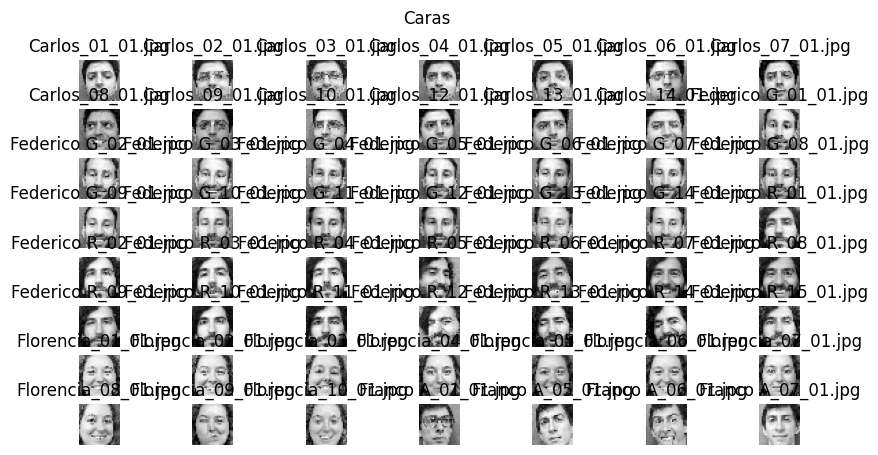

In [112]:
import matplotlib.pyplot as plt

# Número de columnas y filas en la cudrícula
num_rows = 8
num_cols = 7

# Crear una nueva figura y ponerle un título
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
fig.suptitle('Caras')

# Recorta las primeras 10 caras y las muestra.
for i in range(num_rows * num_cols):
    if i >= faces_array.shape[0]:
        break
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(faces_array[i].reshape((30,30)), cmap='gray') # 30 Es el tamaño de la imagen
    ax.set_title(image_names[i])
    ax.axis('off')

# Show the plot
plt.show()

Otra versión para ver las imágenes.

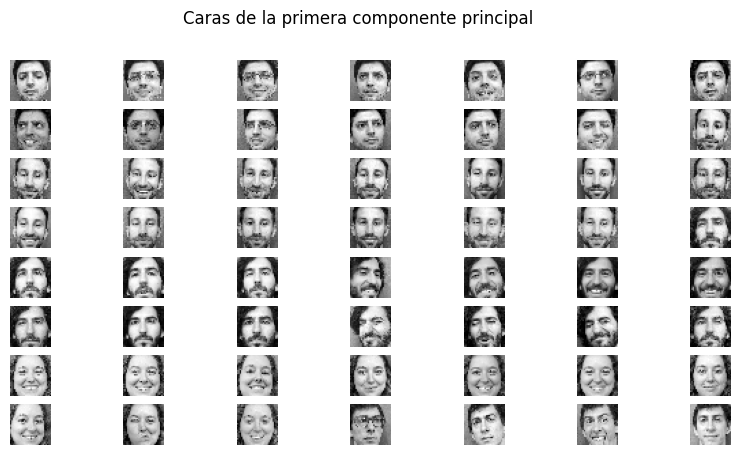

In [113]:
import matplotlib.pyplot as plt

# Número de columnas y filas en la cuadrícula
num_rows = 8
num_cols = 7

# Crear una nueva figura y ponerle un título
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
fig.suptitle('Caras de la primera componente principal')

# Filtrar las imágenes que corresponden a la primera componente principal
first_component_images = []

for i in range(new_faces_array_transformed.shape[0]):
    if new_faces_array_transformed[i, 0] != 0:  # Si la primera componente principal no es cero
        first_component_images.append(faces_array[i])

# Mostrar las primeras imágenes que corresponden a la primera componente principal
for i, image in enumerate(first_component_images):
    if i >= num_rows * num_cols:
        break
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(image.reshape((30,30)), cmap='gray')
    ax.axis('off')

# Mostrar el gráfico
plt.show()

Ver datos trasnformados y trazar diagrama de Scree plot y PC1 vs. PC2

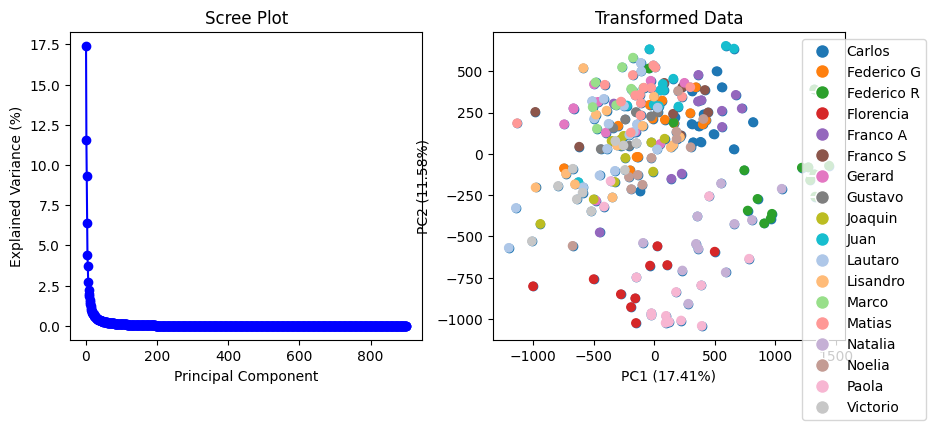

In [125]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) # Creación grilla

# Gráfico de Scree plot
ax1.plot(np.arange(1, len(explained_variances)+1), explained_variances, 'bo-')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance (%)')
ax1.set_title('Scree Plot')

# Gráfico de contribuciones individuaeles PCA1 vs- PCA2
#ax2.scatter(new_faces_array_transformed[:, 0], new_faces_array_transformed[:, 1],  c=image_person)
# Gráfico de contribuciones individuales PCA1 vs PCA2
scatter = ax2.scatter(new_faces_array_transformed[:, 0], new_faces_array_transformed[:, 1], label=image_person)
# Agregar leyenda
# legend1 = ax2.legend(*scatter.legend_elements(),                    loc="upper left", title="Image Person")



# Supongamos que image_person es una lista o array que contiene los nombres de las imágenes
# y que tiene la misma longitud que new_faces_array_transformed
# Y que personas es un conjunto de todas las personas únicas en image_person
personas = np.unique(image_person)

# Creamos una paleta de colores personalizada con 18 colores
# Puedes modificar los colores como desees
paleta_colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7']

# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]

# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]

# Gráfico de contribuciones individuales PCA1 vs PCA2
scatter = ax2.scatter(new_faces_array_transformed[:, 0], new_faces_array_transformed[:, 1], c=colores_personas)

# Crear leyenda personalizada
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]
ax2.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))

ax2.set_xlabel('PC1 ({:.2f}%)'.format(explained_variances[0]))
ax2.set_ylabel('PC2 ({:.2f}%)'.format(explained_variances[1]))
ax2.set_title('Transformed Data')
plt.show()